<a href="https://colab.research.google.com/github/danielasenraoka/music_evolution/blob/main/exploratory_anaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modules

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

# Load data

Hay 3 sets de datos distintos, uno separado por décadas desde 1950 hasta 2010, otro anual desde 1921 hasta 2020 y otro anual con clasificación de géneros.

In [3]:
df1950 = pd.read_csv('https://drive.google.com/uc?id=1noqg-775SO0v40hrgTtGsp1GOxivHZ6n')
df1960 = pd.read_csv('https://drive.google.com/uc?id=1f6liQlLGSttkfnbRmOOKewvWqbdwbXfQ')
df1970 = pd.read_csv('https://drive.google.com/uc?id=1Jg2CudFnNec1XjJCDqrn36yfqlUbq_vs')
df1980 = pd.read_csv('https://drive.google.com/uc?id=1hUBBrAvJ1TTEv6DX6C8jKIEKov0K0bt2')
df1990 = pd.read_csv('https://drive.google.com/uc?id=1ESVRKbOtHBTP0Xb4AS18fj_gVkjyZD0O')
df2000 = pd.read_csv('https://drive.google.com/uc?id=1b27bWLmepXYmbDNfQ6XIqBt2t3Eu2w4h')
df2010 = pd.read_csv('https://drive.google.com/uc?id=1uMLElUSFgFUh4r68Bia_sNo29lUJDwY8')

df1921_2020 = pd.read_csv('https://drive.google.com/uc?id=1WDwMPhvSGxKgyfKNLBm5o0dEXjBvJdIC')

# Dani, te dejo este coso para que cargues. Capaz podemos reemplazar los que tengan generos falopa con los generos de aca:
# https://data.mendeley.com/datasets/3t9vbwxgr5/2/files/d2c58546-d8be-4d57-af14-b61337c927b2

df_genre = pd.read_csv('https://drive.google.com/uc?id=14r8pyBecJyFeGd0Dxky6H1KEM5JqY0l2') 


# Decades dataset (weird genres)

In [ ]:
df1950.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60


In [5]:
decades = ["1950", "1960", "1970", "1980", "1990", "2000", "2010"]

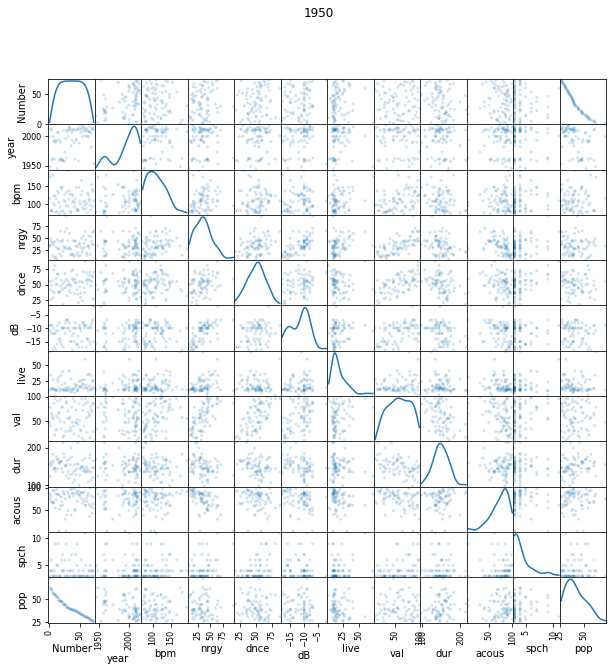

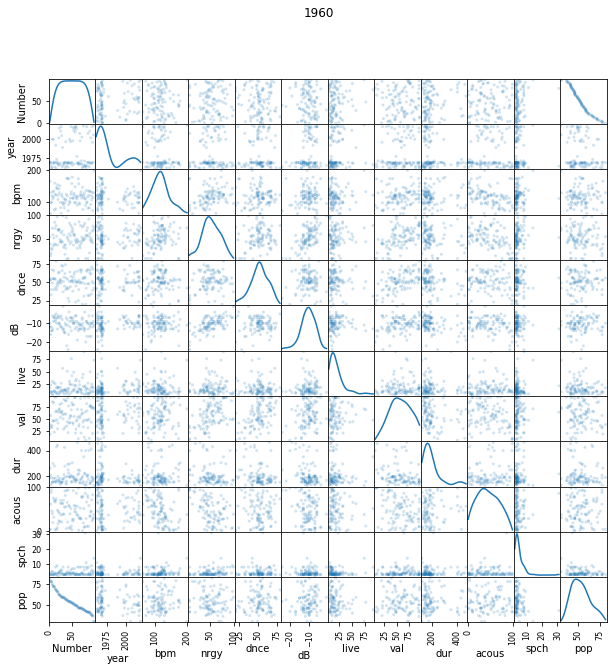

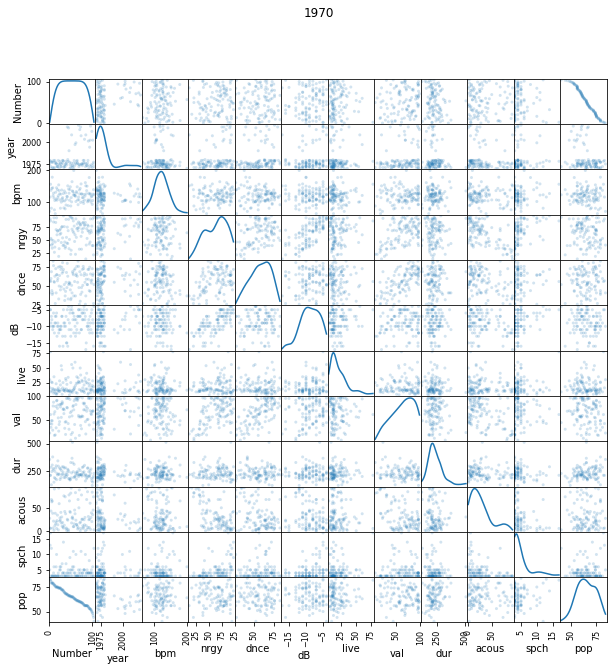

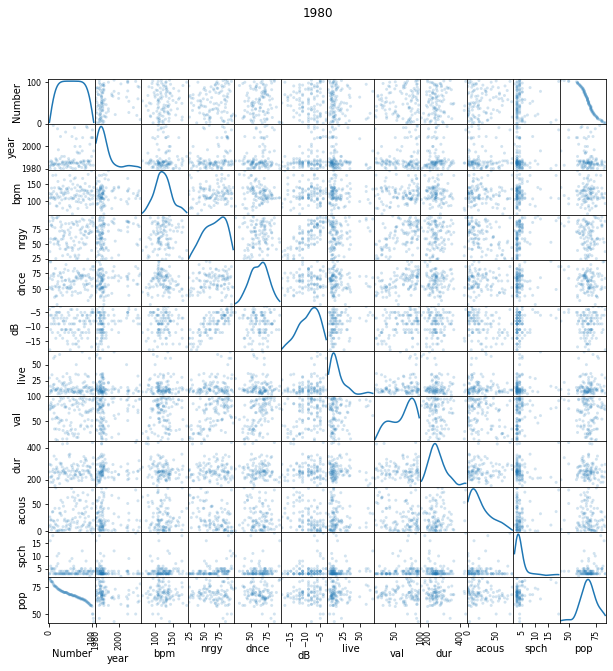

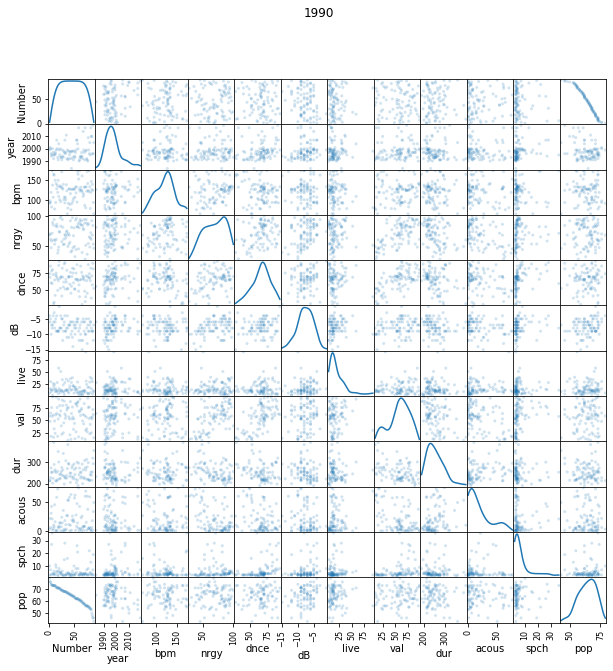

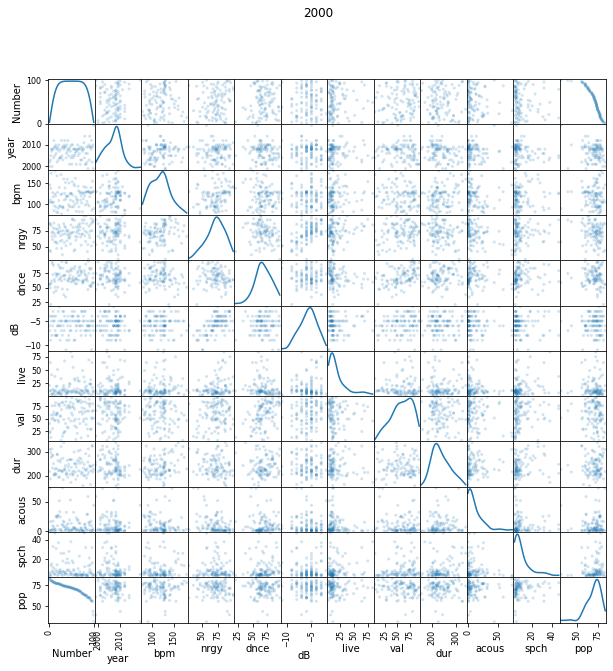

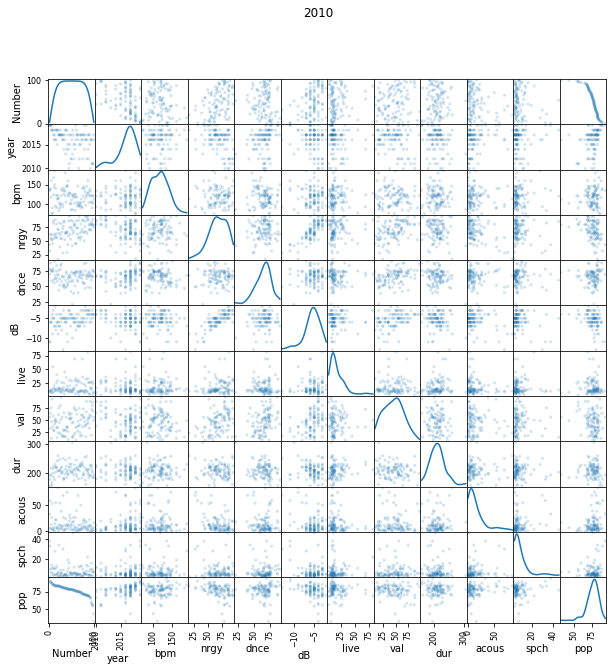

In [ ]:
for decade in decades:
  scatter_matrix(eval("df"+decade), alpha=0.2, figsize=(10, 10),  diagonal="kde")
  plt.suptitle(decade)
  plt.show()

## Tempo evolution through decades

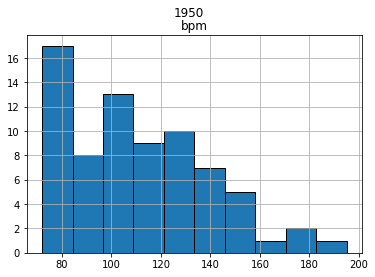

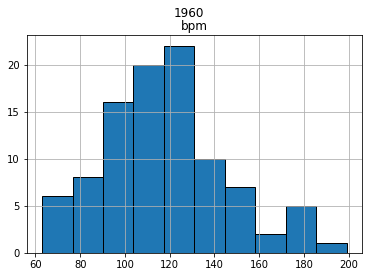

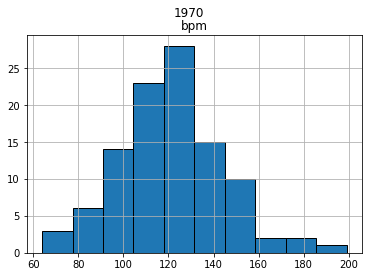

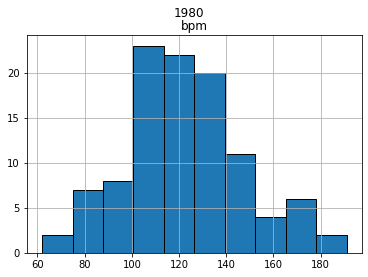

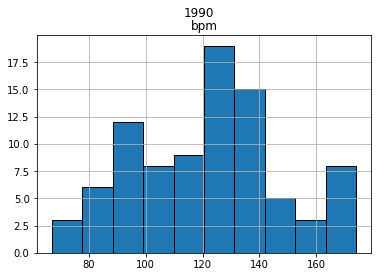

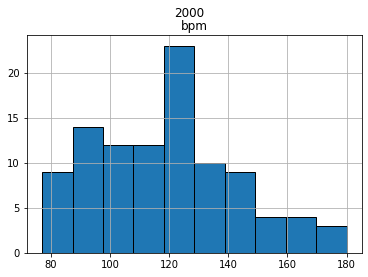

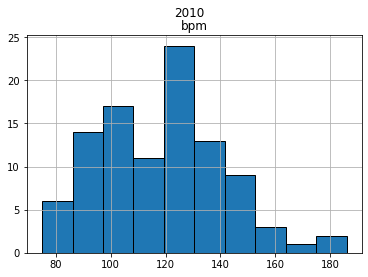

In [12]:
mean_vals = []
st_devs = []
mode_vals = []
for decade in decades:
  #eval("df"+decade)['bpm'].plot.kde()
  eval("df"+decade).hist(column = 'bpm', edgecolor = 'black')
  mean_vals.append(eval("df"+decade)['bpm'].mean())
  mode_vals.append(eval("df"+decade)['bpm'].mode()[0]) # mode() devuelve varias modas, me quedo con la primera
  st_devs.append(eval("df"+decade)['bpm'].std())
  np.mean(eval("df"+decade)['bpm'])
  plt.suptitle(decade)
  plt.show()

In [11]:
eval("df1950")['bpm'].mode()

0     79
1     81
2     97
3    109
4    114
5    123
6    137
dtype: int64

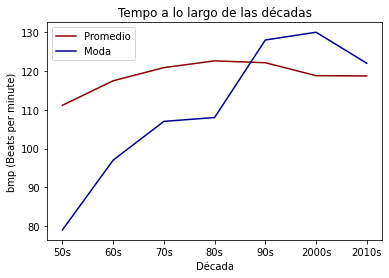

In [14]:
decades_list = [1950+10*i for i in range(7)]
#plt.errorbar(decades_list, mean_vals, st_devs, fmt = '-o', color = 'darkred')
plt.plot(decades_list, mean_vals, color = 'darkred', label = 'Promedio')
plt.plot(decades_list, mode_vals, color = 'darkblue', label = 'Moda')
plt.ylabel("bmp (Beats per minute)")
plt.xlabel("Década")
plt.xticks(decades_list, ['50s', '60s', '70s', '80s', '90s', '2000s', '2010s'])
plt.title('Tempo a lo largo de las décadas')
plt.legend()
plt.show()

## Genre evolution through decades

Estos son todos los géneros:

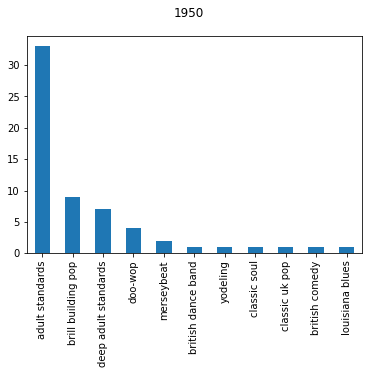

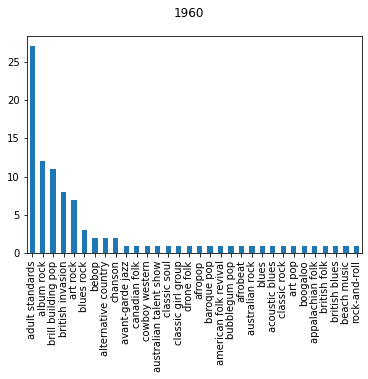

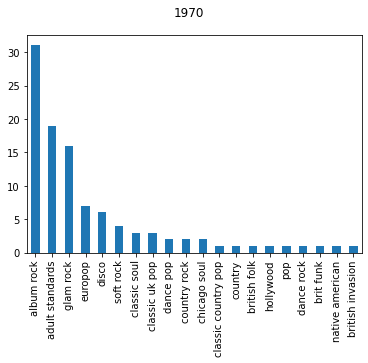

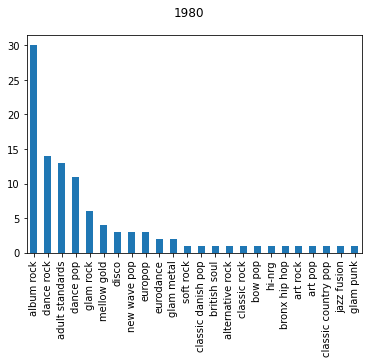

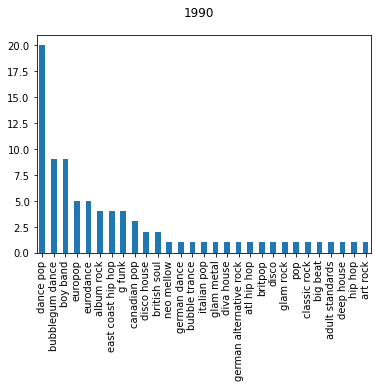

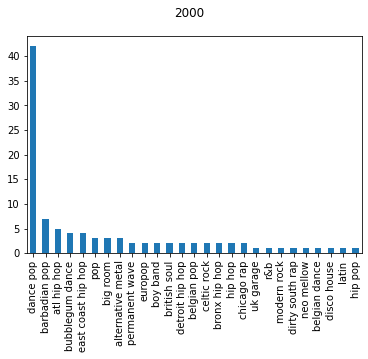

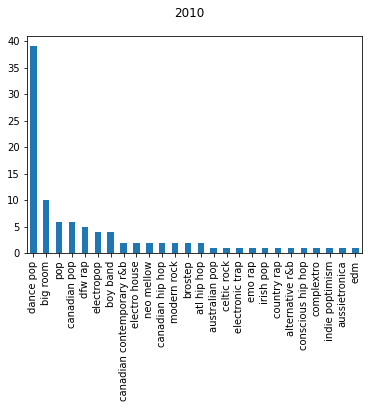

In [ ]:
for decade in decades:
  eval("df"+decade)['top genre'].value_counts().plot(kind='bar')
  plt.suptitle(decade)
  plt.show()

Para ver como es el set de datos anual de 1921 a 2020. 
No tiene la clasificación según el género, podríamos clasificarla utilizando como training set el set de décadas y luego ver la evolución temporal.

Add a decade column because "year" is not the year of the original song

In [ ]:
for decade in decades:
  eval("df"+decade)['decade']= int(decade)

**merge datasets by decades into one data frame**

In [ ]:
df_all_decades = pd.concat([df1960,df1970,df1980,df1990,df2000, df2010])
df_all_decades.tail()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,decade
95,96,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,dance pop,2011,90,80,65,-3,27,80,211,3,10,56,2010
96,97,Dynamite,Taio Cruz,dance pop,2011,120,79,76,-4,3,87,203,0,8,56,2010
97,98,Break Your Heart,Taio Cruz,dance pop,2011,122,89,67,-5,24,68,185,0,3,54,2010
98,99,Summer Air,ItaloBrothers,dance pop,2017,102,75,76,-4,8,49,184,6,7,43,2010
99,100,All I Wanna Do,Martin Jensen,big room,2016,112,79,73,-4,7,56,194,16,7,32,2010


Estos son todos los géneros:

In [ ]:
all_genres = set(df_all_decades['top genre'])
all_genres

{'acoustic blues',
 'adult standards',
 'afrobeat',
 'afropop',
 'album rock',
 'alternative country',
 'alternative metal',
 'alternative r&b',
 'alternative rock',
 'american folk revival',
 'appalachian folk',
 'art pop',
 'art rock',
 'atl hip hop',
 'aussietronica',
 'australian pop',
 'australian rock',
 'australian talent show',
 'avant-garde jazz',
 'barbadian pop',
 'baroque pop',
 'beach music',
 'bebop',
 'belgian dance',
 'belgian pop',
 'big beat',
 'big room',
 'blues',
 'blues rock',
 'boogaloo',
 'bow pop',
 'boy band',
 'brill building pop',
 'brit funk',
 'british blues',
 'british folk',
 'british invasion',
 'british soul',
 'britpop',
 'bronx hip hop',
 'brostep',
 'bubble trance',
 'bubblegum dance',
 'bubblegum pop',
 'canadian contemporary r&b',
 'canadian folk',
 'canadian hip hop',
 'canadian pop',
 'celtic rock',
 'chanson',
 'chicago rap',
 'chicago soul',
 'classic country pop',
 'classic danish pop',
 'classic girl group',
 'classic rock',
 'classic soul',

In [ ]:
#Remove nan
df_all_decades_filter = df_all_decades.dropna(subset = ['top genre'])

Uniformize genres: all pop, all hip hop, ...

In [ ]:
#pop
df_all_decades_filter['top genre'].replace(dict.fromkeys(['italian pop', 'irish pop', 'canadian pop', 'australian pop', 'barbadian pop', 
                                                          'bubblegum pop', 'bubblegum dance', 'belgian pop', 'classic uk pop', 'britpop'],
                                                         'pop'), inplace=True)

#hip hop
df_all_decades_filter['top genre'].replace(dict.fromkeys(['bronx hip hop', 'canadian hip hop', 'conscious hip hop', 'detroit hip hop',
                                                          'east coast hip hop', 'atl hip hip', 'g funk'],
                                                          'hip hop'), inplace=True)

# rap
df_all_decades_filter['top genre'].replace(dict.fromkeys(['dfw rap', 'chicago rap', 'dirty south rap', 'emo rap'],
                                                          'rap'), inplace=True)

# electronic
df_all_decades_filter['top genre'].replace(dict.fromkeys(['brostep', 'bubble trance', 'complextro', 'deep house', 
                                                          'edm', 'electro house', 'electropop', 'aussietronica', 
                                                          'uk garage'],
                                                          'electronic'), inplace=True)
# rock
df_all_decades_filter['top genre'].replace(dict.fromkeys(['album rock', 'australian rock', 'blues rock','glam rock',
                                                          'soft rock', 'rock-and-roll', 'classic rock', 'modern rock'],
                                                          'rock'), inplace=True)

# soul
df_all_decades_filter['top genre'].replace(dict.fromkeys(['chicago soul', 'british soul', 'classic soul'],
                                                          'soul'), inplace=True)
# jazz
df_all_decades_filter['top genre'].replace(dict.fromkeys(['bebop', 'avant-garde jazz', 'jazz fusion'],
                                                          'jazz'), inplace=True)
# r&b
df_all_decades_filter['top genre'].replace(dict.fromkeys(['canadian contemporary r&b', 'alternative r&b'],
                                                          'r&b'), inplace=True)
# blues
df_all_decades_filter['top genre'].replace(dict.fromkeys(['british blues', 'acoustic blues'],
                                                          'blues'), inplace=True)

# metal
df_all_decades_filter['top genre'].replace(dict.fromkeys([],
                                                          'metal'), inplace=True)

# alternative
df_all_decades_filter['top genre'].replace(dict.fromkeys([],
                                                          'alternative'), inplace=True)

# folk
df_all_decades_filter['top genre'].replace(dict.fromkeys(['american folk revival', 'appalachian folk', 'british folk', 'canadian folk'],
                                                          'folk'), inplace=True)

# country
df_all_decades_filter['top genre'].replace(dict.fromkeys(['country rap', 'classic country pop', 'country rock'],
                                                         'country'), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
set(df_all_decades_filter['top genre']) 

{'adult standards',
 'afrobeat',
 'afropop',
 'alternative country',
 'alternative metal',
 'alternative rock',
 'art pop',
 'art rock',
 'atl hip hop',
 'australian talent show',
 'baroque pop',
 'beach music',
 'belgian dance',
 'big beat',
 'big room',
 'blues',
 'boogaloo',
 'bow pop',
 'boy band',
 'brill building pop',
 'brit funk',
 'british folk',
 'british invasion',
 'canadian folk',
 'celtic rock',
 'chanson',
 'classic country pop',
 'classic danish pop',
 'classic girl group',
 'country',
 'country rap',
 'country rock',
 'cowboy western',
 'dance pop',
 'dance rock',
 'disco',
 'disco house',
 'diva house',
 'drone folk',
 'electronic',
 'electronic trap',
 'eurodance',
 'europop',
 'folk',
 'german alternative rock',
 'german dance',
 'glam metal',
 'glam punk',
 'hi-nrg',
 'hip hop',
 'hip pop',
 'hollywood',
 'indie poptimism',
 'jazz',
 'jazz fusion',
 'latin',
 'mellow gold',
 'native american',
 'neo mellow',
 'new wave pop',
 'permanent wave',
 'pop',
 'r&b',
 'rap

In [ ]:
df_all_decades_filter.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,decade
0,1,Here Comes The Sun - Remastered 2009,The Beatles,british invasion,1969,129,54,56,-10,18,39,186,3,3,82,1960
1,2,Come Together - Remastered 2009,The Beatles,british invasion,1969,165,38,53,-12,9,19,260,3,4,79,1960
2,3,Sweet Caroline,Neil Diamond,adult standards,1969,63,13,53,-16,24,58,204,61,3,78,1960
3,4,Yesterday - Remastered 2009,The Beatles,british invasion,1965,97,18,33,-12,9,32,126,88,3,78,1960
4,5,Can't Help Falling in Love,Elvis Presley,adult standards,1961,100,29,40,-14,11,34,182,94,3,78,1960


## Matriz de correlación

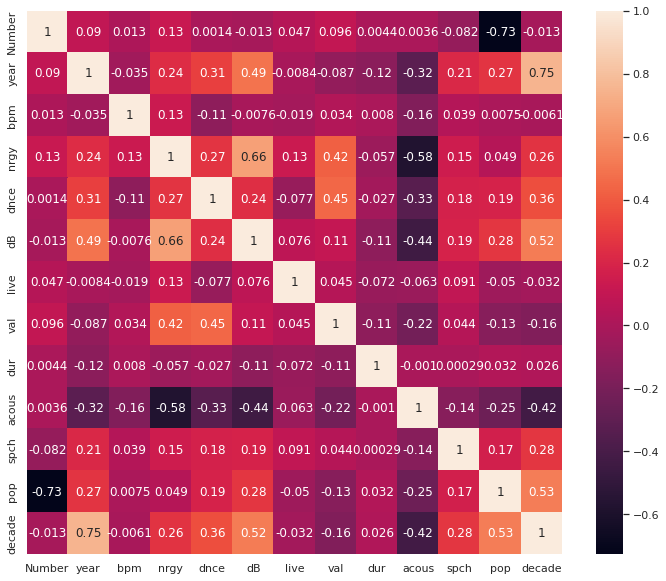

In [ ]:
corr_matrix = df_all_decades_filter.corr()
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(corr_matrix, annot=True)

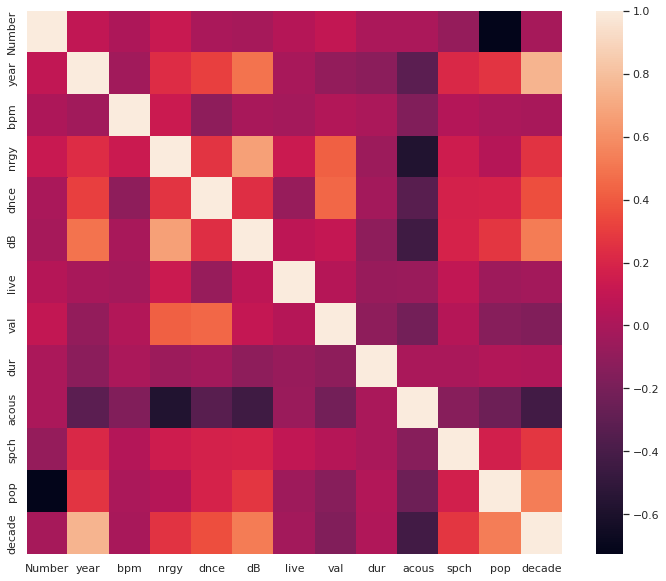

In [ ]:
# sin coef correlación
sns.heatmap(corr_matrix)

# 1921-2020 dataset

In [ ]:
df1921_2020.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.153,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.472,2020
169908,0.1090,['Ingrid Andress'],0.512,214787,0.428,0,60RFlt48hm0l4Fu0JoccOl,0.000000,0,0.1050,-7.387,1,More Hearts Than Mine,65,2020-03-27,0.0271,80.588,0.366,2020


In [ ]:
df1921_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

## Matriz de correlación

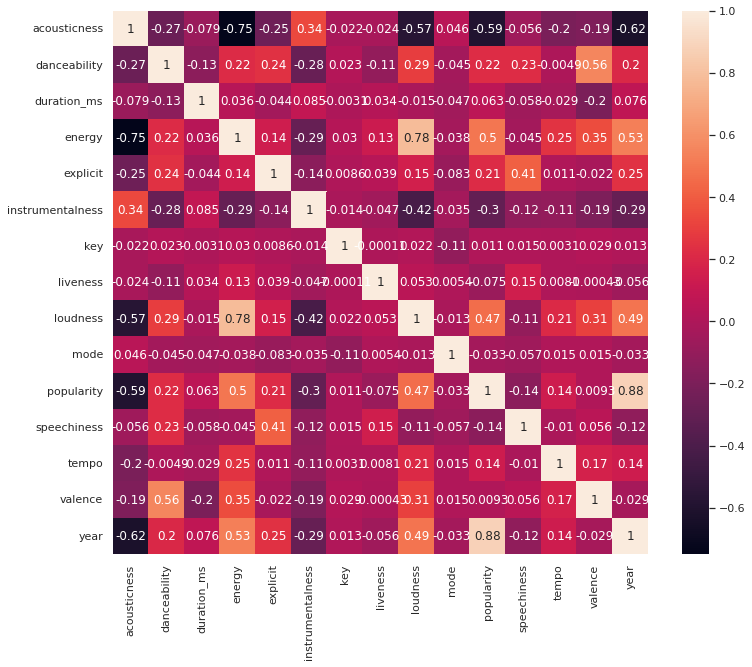

In [ ]:
corr_matrix_1921_2020 = df1921_2020.corr()
sns.heatmap(corr_matrix_1921_2020, annot=True)

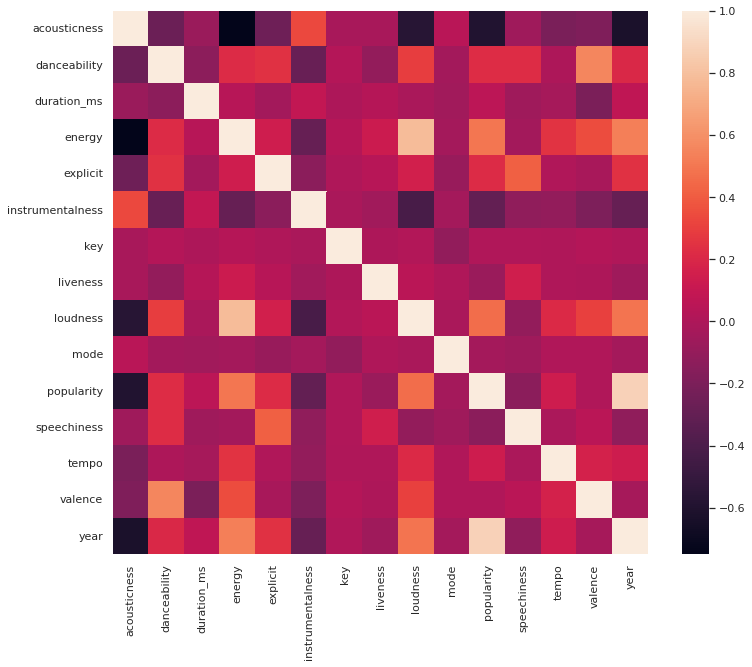

In [ ]:
sns.heatmap(corr_matrix_1921_2020)

# Genre dataset

Para clasificar

In [ ]:
df_genre.tail()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
28367,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.001350,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,0.066324,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.040811,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,0.035401,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,0.001196,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.070867,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286
28371,82451,jeezy,r.i.p.,2019,hip hop,remix killer alive remix thriller trap bitch s...,83,0.001012,0.075202,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012,0.754444,0.046284,0.001012,0.001012,0.001012,0.001012,0.001012,0.033995,0.828875,0.674794,0.015862,0.000000,0.475474,0.492477,obscene,0.014286


In [ ]:
set(df_genre['genre'])

{'blues', 'country', 'hip hop', 'jazz', 'pop', 'reggae', 'rock'}

number of songs per year:

2019 1950


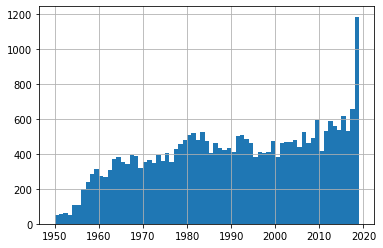

In [ ]:
print(max(df_genre['release_date']),min(df_genre['release_date']))
df_genre['release_date'].hist(bins=(2019-1950))


# To-do's
* Limpiar los datos
* frecuencia vs. tiempo por género
* tempo y variabilidad tempo

* Clasificar mejor los viejos
* Clasificador géneros
* Top artistas
* Correlaciones (OK)